<a href="https://colab.research.google.com/github/Jorgfig/Trabajo-Final-Diplomatura-Business-Analytics-UDA/blob/main/Figueroa_Jorge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **<font color="Grey">Trabajo Final - Módulo 5</font>**

 Integrantes:
 - Figueroa Jorge,
 - Sanchez Fabián


 <p align="justify">
En el presente trabajo, realizamos el análisis de datos para determinar cuáles clientes posiblemente vayan a abandonar la empresa.
<br><br>


In [29]:
url ="https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/refs/heads/main/Datasets/train.csv"

In [30]:
#Leemos el conjunto de datos y establecemos como índice Custermer Id ya que es un número de identificación única para cada cliente.
import pandas as pd
import numpy as np
baja_clientes = pd.read_csv(url, index_col=1)
baja_clientes.head()


,Unnamed: 0,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
7838-LAZFO,5552,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,Male,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
8189-DUKMV,5805,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,Female,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
3758-CKOQL,2640,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,Female,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
5619-PTMIK,3976,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,Female,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
9115-YQHGA,6429,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,Male,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


In [31]:
#Realizamos la limpieza del conjunto de datos para poder analizar en profundidad aquellas variables relacionadas con la problemática
baja_clientes = baja_clientes.drop(columns=["Unnamed: 0", "Count","Country", "State", "Zip Code", "Lat Long"])

In [32]:
baja_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5274 entries, 7838-LAZFO to 5996-NRVXR
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               5274 non-null   object 
 1   Latitude           5274 non-null   float64
 2   Longitude          5274 non-null   float64
 3   Gender             5274 non-null   object 
 4   Senior Citizen     5274 non-null   object 
 5   Partner            5274 non-null   object 
 6   Dependents         5274 non-null   object 
 7   Tenure Months      5274 non-null   int64  
 8   Phone Service      5274 non-null   object 
 9   Multiple Lines     5274 non-null   object 
 10  Internet Service   5274 non-null   object 
 11  Online Security    5274 non-null   object 
 12  Online Backup      5274 non-null   object 
 13  Device Protection  5274 non-null   object 
 14  Tech Support       5274 non-null   object 
 15  Streaming TV       5274 non-null   object 
 16  Streaming Movi

In [33]:
baja_clientes.head()

,City,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,
7838-LAZFO,Hanford,36.292230,-119.622676,Male,No,Yes,No,45,Yes,No,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
8189-DUKMV,Rancho Cordova,38.591134,-121.161585,Female,No,Yes,No,4,Yes,No,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
3758-CKOQL,Valyermo,34.395830,-117.734568,Female,No,Yes,No,59,Yes,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
5619-PTMIK,Lemon Grove,32.733564,-117.033713,Female,No,Yes,No,46,Yes,Yes,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
9115-YQHGA,Lemoore,36.303666,-119.825657,Male,No,No,No,40,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


#Realizamos una definición de las variables

* **City**: Ciudad.
* **Latitude**: Latitud del domicilio del cliente.
* **Longitude**: Longiud del domicilio del cliente
* **Gender**: Género.
* **Senior Citizen**: Significa si la persona es de la tercera edad.
* **Partner**: Indica si es o no cliente en la actualidad.
* **Dependents**: Si la persona posee algún tipo de dependencia económica.
* **Tenure Months**: Antigüedad con el servicio, expresado en meses.
* **Phone Service**: Posee el servicio de telefonía contratado?.
* **Multiple Lines**: Posee multiples líneas?.
* **Internet Service?**: Servicio de Internet.
* **Online Security**: Seguridad en línea.
* **Online Backup**: Servicio de respaldo.
* **Device Protection**: Servicio de Protección.
* **Tech Support**: Soporte técnico.
* **Streaming TV**: Servicio de televisión.
* **Streaming Movies**: Servicio de películas.
* **Contract**: Tipo de contrato.
* **Paperless Billing**: Facturación sin papel.
* **Payment Method**: Método de pago.
* **Monthly Charges**: Cargo mensual.
* **Total Charges**: Total de cargos desde que contrató el servicio.
* **Churn Label**: Dió de baja el servicio?
* **CLTV**: Valor del ciclo de vida del cliente.
* **Churn Reazon**: Razón de baja de servicio.




In [34]:
#Renombramos las columnas
baja_clientes.rename(columns={'City': 'Ciudad',
                              'Latitude': 'Latitud',
                              'Longitude': 'Longitud',
                              'Gender': 'Género',
                              'Senior Citizen': 'Persona de la Tercera Edad',
                              'Partner': 'Cliente',
                              'Dependents': 'Dependiente Económicamente',
                              'Tenure Months': 'Antigüedad',
                              'Phone Service': 'Servicio de Telefonía',
                              'Multiple Lines': 'Multiples Líneas',
                              'Internet Service': 'Servicio de Internet',
                              'Online Security': 'Seguridad Online',
                              'Online Backup': 'Servicio de Respaldo',
                              'Device Protection': 'Servicio de Protección',
                              'Terch Support': 'Servicio Técnico',
                              'Streaming TV': 'Servicio de TV',
                              'Streaming Movies': 'Servicio de Películas',
                              'Contract': 'Duración Contrato',
                              'Paperless Billing': 'Factura sin papel',
                              'Payment Method': 'Método de Pago',
                              'Monthly Charges': 'Cargos mensuales',
                              'Total Charges': 'Total de cargos',
                              'Churn Label': 'Dió de baja el servicio',
                              'CLTV': 'Ciclo de vida del cliente',
                              'Churn Reason': 'Motivo de baja'}, inplace =True)

#**Análisis Exploratorio de Datos**

---
### Una vez que limpiamos el conjunto de datos, redefinimos variables y eliminamos aquellas que no eran necesarias para el caso, comenzamos con el proceso de analizar aquellas variables que podrían aportarnos más información de porqué los clientes tomaron la decisión de darse de baja del servicio.
---



In [35]:
baja_clientes

,Ciudad,Latitud,Longitud,Género,Persona de la Tercera Edad,Cliente,Dependiente Económicamente,Antigüedad,Servicio de Telefonía,Multiples Líneas,...,Servicio de TV,Servicio de Películas,Duración Contrato,Factura sin papel,Método de Pago,Cargos mensuales,Total de cargos,Dió de baja el servicio,Ciclo de vida del cliente,Motivo de baja
CustomerID,,,,,,,,,,,,,,,,,,,,,
7838-LAZFO,Hanford,36.292230,-119.622676,Male,No,Yes,No,45,Yes,No,...,Yes,Yes,One year,No,Bank transfer (automatic),78.80,3597.50,No,4192,NaN
8189-DUKMV,Rancho Cordova,38.591134,-121.161585,Female,No,Yes,No,4,Yes,No,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.50,79.05,No,3233,NaN
3758-CKOQL,Valyermo,34.395830,-117.734568,Female,No,Yes,No,59,Yes,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.00,6152.30,No,4620,NaN
5619-PTMIK,Lemon Grove,32.733564,-117.033713,Female,No,Yes,No,46,Yes,Yes,...,No,No,Month-to-month,No,Electronic check,53.10,2459.80,No,3358,NaN
9115-YQHGA,Lemoore,36.303666,-119.825657,Male,No,No,No,40,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,51.10,2092.90,No,3355,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2277-AXSDC,El Centro,32.770393,-115.609150,Female,No,No,No,32,Yes,No,...,No internet service,No internet service,One year,No,Bank transfer (automatic),19.75,624.15,No,4691,NaN
5895-QSXOD,Alleghany,39.467828,-120.841386,Male,No,No,No,9,Yes,No,...,No,No,Month-to-month,No,Mailed check,70.05,657.50,No,3522,NaN
4626-GYCZP,Eureka,40.737431,-124.108897,Male,No,No,No,7,Yes,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,93.85,635.60,Yes,3506,Network reliability


In [36]:
#Realizamos un mapa con Plotly para ver si existe relación entre las variables de dependencia económica y los cargos mensuales.
import plotly.express as px
fig = px.scatter_mapbox(baja_clientes,
                        lat="Latitud",
                        lon="Longitud",
                        hover_data=["Dependiente Económicamente", "Cargos mensuales"],
                        color = "Dió de baja el servicio",
                        color_discrete_sequence=px.colors.qualitative.G10,
                        zoom=5
                        )
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [37]:
#Eliminamos Latitud y longitud ya que en el próximo paso que ejecutaremos, no nos aportará información precisa.
baja_clientes.drop(columns=["Latitud", "Longitud"], inplace=True)

#**<u>Análisis Descriptivo</u>**

Realizamos estadistica descriptiva. El metodo _descrive_ nos permite ver en mayor detalle un resumen estadístico de las variables en analisis del DataFrame como: cantidad de valores nulos, promedio, desviación estandar, valor mínimo, cuartiles y valor máximo.


In [38]:
round(baja_clientes.describe(include="number"),2).T


,count,mean,std,min,25%,50%,75%,max
Antigüedad,5274.0,32.46,24.71,1.00,9.00,29.0,56.00,72.00
Cargos mensuales,5274.0,64.53,30.10,18.25,35.21,70.3,89.80,118.75
Total de cargos,5274.0,2277.73,2274.19,18.85,389.14,1378.6,3803.72,8684.80
Ciclo de vida del cliente,5274.0,4402.84,1184.38,2003.00,3470.25,4521.0,5387.00,6499.00


<u>Conclusiones de Análisis Descriptivo</u>:

- La antigüedad promedio y mediana, podemos visualizar que los valores son bastante similares, no hay diferencias significativa. El promedio de tiempo que los clientes están susciptos es aproximadamente 32.46 meses, mientras que el valor medio de la antigüedad es de  meses.
- Con respecto a los cargos mensuales, analizando estos dos ítems anteriores podemos también verificar que son bastantes similares (promedio 64.53 USD, mientras que el valor medio 70.3 USD).
- En cuanto al ciclo de vida del cliente ambos valores son bastantes semejantes: media es 4402.84 y la mediana 4521.   



---
Creamos un nuevo DataFram, donde solo visualizaremos aquellas variables numéricas para poder afiniar aún más la visualización de los datos. Para ello haremos un histrograma donde se observará los cargos mensuales de los clientes.

In [39]:
px.histogram(baja_clientes, x="Cargos mensuales", color="Dió de baja el servicio", barmode="group")


En este histograma optamos por ver que relación tienen dos variables fundamentales: Cargos mensuales relacionados con la baja del servicio. Dónde podemos visualizar que los clientes que en mayoría dieron de baja el servicio, son aquellos que poseían cargos mensuales entre 68 y 106 USD.

In [40]:
px.box(baja_clientes, x="Dió de baja el servicio", y="Cargos mensuales")

En este gráfico  podemos observar que en el conjunto de datos no existen valores anómalos.

El gráfico también sugiere que los clientes con cargos mensuales más altos tienen una mayor propensión a dar de baja el servicio. Esto apoya la conclusión del histograma anterior.

#<u>Variables Categóricas</u>


In [41]:
baja_clientes.describe(include="object").T

,count,unique,top,freq
Ciudad,5274,1127,Los Angeles,237
Género,5274,2,Male,2662
Persona de la Tercera Edad,5274,2,No,4417
Cliente,5274,2,No,2711
Dependiente Económicamente,5274,2,No,4056
Servicio de Telefonía,5274,2,Yes,4750
Multiples Líneas,5274,3,No,2554
Servicio de Internet,5274,3,Fiber optic,2296
Seguridad Online,5274,3,No,2608
Servicio de Respaldo,5274,3,No,2279


Basándonos en el análisis descriptivo de las variables categóricas (mostrado en la tabla anterior), podemos sacar las siguientes conclusiones:

- Ciudad: Hay una gran cantidad de ciudades únicas (1127), siendo "Los Angeles" la más frecuente. Esto sugiere que los clientes están distribuidos en muchas ubicaciones diferentes.
- Género: La distribución entre hombres y mujeres es bastante equilibrada (2662 hombres vs el resto mujeres).
- Persona de la Tercera Edad: La gran mayoría de los clientes no son de la tercera edad (4417 vs el resto sí).
- Cliente y Dependiente Económicamente: Hay más clientes que no tienen pareja (2711 vs el resto sí) y más clientes que no tienen dependientes económicos (4056 vs el resto sí).
- Servicio de Telefonía y Múltiples Líneas: La mayoría de los clientes tienen servicio de telefonía (4750 vs el resto no), pero una gran parte de ellos no tienen múltiples líneas (2554 vs el resto sí o no tienen servicio de internet).
- Servicio de Internet: La opción más común de servicio de internet es "Fiber optic" (2296), seguida de "DSL" y luego "No internet service".
- Servicios Adicionales (Seguridad Online, Respaldo, Protección, Soporte Técnico, TV, Películas): En general, una parte significativa de los clientes no tienen estos servicios adicionales. Por ejemplo, para "Seguridad Online", 2608 clientes no lo tienen. Esto podría ser un área a investigar para entender si la falta de estos servicios influye en la baja.
- Duración Contrato: El tipo de contrato "Month-to-month" es el más frecuente (2884), lo cual podría indicar una menor lealtad o compromiso a largo plazo.
- Factura sin papel: La mayoría de los clientes prefieren la factura sin papel (3105 vs el resto sí).
- Método de Pago: El método de pago más común es "Electronic check" (1797).
- Dió de baja el servicio: La mayoría de los clientes no han dado de baja el servicio (3863 vs el resto sí). Esto es importante para entender la proporción de bajas en el conjunto de datos.
- Motivo de baja: De los clientes que sí dieron de baja (1411), hay 20 razones únicas, siendo la más frecuente "Competitor offered higher download speeds" (143). Esto señala que las ofertas de la competencia son un factor importante en la pérdida de clientes.

En resumen, se observa que una parte importante de los clientes tienen contratos mes a mes, no tienen servicios adicionales y el método de pago más común es el cheque electrónico. Además, <u>la principal razón de baja está relacionada con ofertas de la competencia</u>. Estas son áreas clave para investigar más a fondo y entender su relación con la propensión a la baja del servicio.

In [42]:
#Analizamos los motivos por lo cuales los clientes decidieron abandonar la compañía

baja_clientes["Motivo de baja"].value_counts()

,count
Motivo de baja,
Competitor offered higher download speeds,143
Attitude of support person,138
Competitor offered more data,130
Don't know,111
Attitude of service provider,107
Competitor made better offer,104
Competitor had better devices,103
Price too high,78
Network reliability,78


En este apartado de analisis, concluimos que las tres principales razones por las que los clientes optaron por darse de baja son:


1.   La competencia ofrece mejor velocidad de descarga.
2.   La actitud del personal de atención al cliente/soporte técnico.
3.   La competencia ofrece mayor cantidad de datos de navegación.


--> Es importante destacar también, que en 5to lugar, los clientes manifestaron también la actitud del prestador de servicio, lo que nos lleva a relacionarlo con el punto número 2. Si sumamos la cantidad de ambas respuestas, podemos concluir que la razón principal por la que los clientes abandonan el servicio es por una mala actitud del personal de atención al cliente (245 clientes manifestaron esto).


---
###Parafinalizar ésta etapa, antes de continuar con el modelo de Machine Learning, terminamos de limpiar la base de datos con aquellas variables que no serán necesarias o no nos aportarán información.
---



In [43]:
baja_clientes.dropna(axis=1, inplace=True)

#<u>Modelo de Machine Learning - Pycaret</u>

In [44]:
baja_clientes.head()

,Ciudad,Género,Persona de la Tercera Edad,Cliente,Dependiente Económicamente,Antigüedad,Servicio de Telefonía,Multiples Líneas,Servicio de Internet,Seguridad Online,...,Tech Support,Servicio de TV,Servicio de Películas,Duración Contrato,Factura sin papel,Método de Pago,Cargos mensuales,Total de cargos,Dió de baja el servicio,Ciclo de vida del cliente
CustomerID,,,,,,,,,,,,,,,,,,,,,
7838-LAZFO,Hanford,Male,No,Yes,No,45,Yes,No,DSL,Yes,...,No,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192
8189-DUKMV,Rancho Cordova,Female,No,Yes,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233
3758-CKOQL,Valyermo,Female,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620
5619-PTMIK,Lemon Grove,Female,No,Yes,No,46,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358
9115-YQHGA,Lemoore,Male,No,No,No,40,Yes,No,DSL,No,...,Yes,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355


In [45]:
#!pip uninstall -y pycaret


In [46]:
!pip install git+https://github.com/pycaret/pycaret.git@master

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-yur0yt59
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-yur0yt59
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [47]:
from pycaret.classification import *

In [48]:
setup(baja_clientes,
      target="Dió de baja el servicio",
      session_id=123)

,Description,Value
0,Session id,123
1,Target,Dió de baja el servicio
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(5274, 22)"
5,Transformed data shape,"(5274, 43)"
6,Transformed train set shape,"(3691, 43)"
7,Transformed test set shape,"(1583, 43)"
8,Numeric features,4
9,Categorical features,17


In [49]:
#2.Comparamos los modelos.

compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7992,0.8463,0.7992,0.7943,0.7953,0.4698,0.4723,2.6960
et,Extra Trees Classifier,0.7637,0.7943,0.7637,0.7459,0.7472,0.3283,0.3396,0.7670
rf,Random Forest Classifier,0.7540,0.7748,0.7540,0.7361,0.7385,0.3066,0.3163,0.9440
ridge,Ridge Classifier,0.7437,0.7676,0.7437,0.7215,0.7253,0.2692,0.2790,0.3200
dummy,Dummy Classifier,0.7326,0.5000,0.7326,0.5367,0.6195,0.0000,0.0000,0.3720
knn,K Neighbors Classifier,0.7274,0.6488,0.7274,0.6992,0.7053,0.2130,0.2224,0.4630
ada,Ada Boost Classifier,0.7272,0.7096,0.7272,0.7168,0.7199,0.2715,0.2743,0.6560
lda,Linear Discriminant Analysis,0.7266,0.7419,0.7266,0.7091,0.7143,0.2484,0.2529,0.4380
gbc,Gradient Boosting Classifier,0.7212,0.6931,0.7212,0.7081,0.7121,0.2483,0.2516,1.1250
xgboost,Extreme Gradient Boosting,0.7182,0.7044,0.7182,0.7075,0.7111,0.2486,0.2510,0.5710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
#3.Seleccionamos el modelo elegido.
lr_model = create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8351,0.8846,0.8351,0.8319,0.8332,0.5697,0.5704
1,0.7859,0.8293,0.7859,0.7745,0.7772,0.4154,0.4206
2,0.7995,0.8657,0.7995,0.7911,0.7935,0.4617,0.4648
3,0.7995,0.8285,0.7995,0.7911,0.7935,0.4617,0.4648
4,0.7805,0.8187,0.7805,0.7826,0.7815,0.4462,0.4463
5,0.8103,0.8663,0.8103,0.8005,0.8003,0.4730,0.4823
6,0.7967,0.8532,0.7967,0.7925,0.7943,0.4705,0.4710
7,0.7913,0.8541,0.7913,0.7964,0.7936,0.4770,0.4775
8,0.7995,0.8310,0.7995,0.7958,0.7974,0.4757,0.4761


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
#4. Optimización del modelo
tuned_lr_model = tune_model(lr_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8432,0.8768,0.8432,0.8382,0.8393,0.5813,0.5843
1,0.7913,0.8333,0.7913,0.7798,0.7819,0.4263,0.4327
2,0.7995,0.8696,0.7995,0.7928,0.7952,0.4688,0.4706
3,0.8022,0.8266,0.8022,0.7909,0.7902,0.4446,0.4558
4,0.7886,0.8238,0.7886,0.7848,0.7865,0.4511,0.4515
5,0.8157,0.8652,0.8157,0.8066,0.8041,0.4808,0.4940
6,0.8022,0.8574,0.8022,0.7961,0.7983,0.4778,0.4792
7,0.7913,0.8605,0.7913,0.7893,0.7903,0.4598,0.4599
8,0.8103,0.8362,0.8103,0.8040,0.8062,0.4939,0.4958


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [52]:
#5.Realizamos la predicción
predict_model(lr_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8219,0.8693,0.8219,0.8187,0.8200,0.5368,0.5373


,Ciudad,Género,Persona de la Tercera Edad,Cliente,Dependiente Económicamente,Antigüedad,Servicio de Telefonía,Multiples Líneas,Servicio de Internet,Seguridad Online,...,Servicio de Películas,Duración Contrato,Factura sin papel,Método de Pago,Cargos mensuales,Total de cargos,Ciclo de vida del cliente,Dió de baja el servicio,prediction_label,prediction_score
CustomerID,,,,,,,,,,,,,,,,,,,,,
2430-RRYUW,Tecate,Male,No,No,No,66,Yes,No,DSL,Yes,...,No,One year,Yes,Mailed check,54.799999,3465.699951,4621,No,No,0.9840
7603-USHJS,San Gabriel,Male,No,No,Yes,12,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Credit card (automatic),73.750000,871.400024,2010,Yes,No,0.8612
2452-MRMZF,Inglewood,Female,Yes,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,Two year,Yes,Credit card (automatic),25.700001,1937.400024,5079,No,No,0.9961
5781-RFZRP,Ladera Ranch,Male,No,Yes,No,71,Yes,Yes,DSL,Yes,...,No,Two year,No,Credit card (automatic),73.500000,5357.750000,5431,No,No,0.9835
9133-AYJZG,Mill Valley,Female,No,No,No,23,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Credit card (automatic),98.699997,2249.100098,5781,No,Yes,0.6374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9090-SGQXL,Ben Lomond,Male,Yes,Yes,No,68,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,105.300003,7299.649902,6284,Yes,Yes,0.5854
1952-DVVSW,Colfax,Female,No,Yes,No,10,Yes,No,No,No internet service,...,No internet service,One year,No,Mailed check,20.100000,184.399994,3509,No,No,0.9078
7168-HDQHG,Brownsville,Female,No,Yes,Yes,36,Yes,No,No,No internet service,...,No internet service,Month-to-month,No,Bank transfer (automatic),19.200001,702.900024,3043,No,No,0.9922


In [53]:
#6.Evaluamos el modelo
evaluate_model(lr_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Basándonos en el gráfico de importancia de las características, las variables más relevantes para predecir la baja de clientes son:

Duración del Contrato (Contract): Este parece ser el factor más importante. Los clientes con contratos mes a mes podrían tener una mayor propensión a irse.
Servicio de Internet (Internet Service): El tipo de servicio de internet que tienen los clientes también es muy influyente.
Total de Cargos (Total Charges): La cantidad total que un cliente ha pagado parece ser un indicador significativo.
Antigüedad (Tenure Months): El tiempo que un cliente lleva con el servicio también es relevante.
Otras variables como los cargos mensuales, el método de pago y los servicios adicionales también tienen cierta importancia, pero en menor medida que las mencionadas anteriormente.

Este análisis sugiere que debemos prestar especial atención a los clientes con contratos cortos, ciertos tipos de servicio de internet, y aquellos con altos cargos totales o poca antigüedad, ya que son los más propensos a darse de baja.

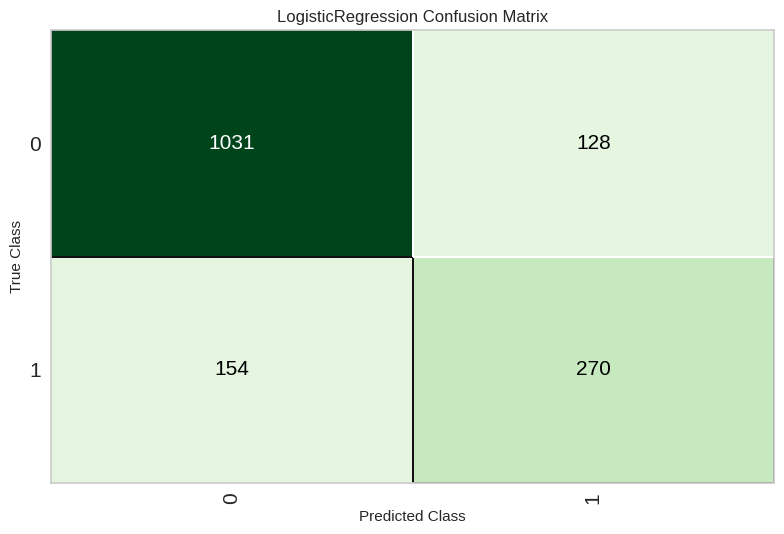

In [54]:
#7.Creamos la matriz de confusión

plot_model(lr_model, plot="confusion_matrix")

##Conclusiones de la Matríz de Confusión

En la matríz de confusión, podemos observar con cuanta exactitud el modelo predijo si el cliente Dio de baja el servicio.

1. Verdadero Negativo (1031): Son los clientes que el modelo predijo correctamente que no darían de baja el servicio.
2. Falso Positivo (128): En este caso el modelo predijo que el cliente si daría de baja el servicio incorrectamente.
3. Falso Negativo (154): El modelo predijo incorrectamente que el cliente no daría de baja el servicio, sin embargo si lo hicieron.
4. Verdadero Positivo (270): Son aquellos clientes que el modelo realmente predijo que darían de baja el servicio.

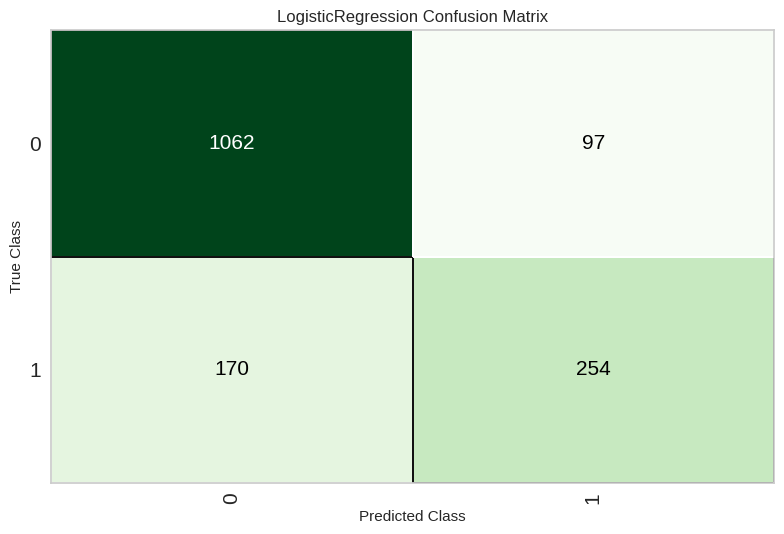

In [55]:
#8. Matríz de confusión del modelo optimizado.
plot_model(tuned_lr_model,plot='confusion_matrix')

#<u>Conclusión de Matrices de Confusión</u>
Al comparar ambas matrices de confusión, observamos que el modelo optimizado presenta una mayor cantidad de falsos negativos (170) en comparación con el modelo sin optimizar (154). Dado que un falso negativo representa un cliente que dio de baja el servicio pero que el modelo predijo incorrectamente que no lo haría, minimizar este error es crucial para identificar a los clientes en riesgo de abandono. Por lo tanto, el modelo sin optimizar es preferible en este escenario específico, ya que identifica correctamente a más clientes que realmente dejaron el servicio.

#<u>Conclusiones Principales</u>:

- <u>Factores Clave de Abandono</u>: En el presente análisis se ha identificado claramente que la duración del contrato, el tipo de servicio de internet, los cargos totales y la antigüedad del cliente son las variables más influyentes a la hora de predecir la baja del servicio.

- <u>Importancia de la Actitud del Personal</U>: Aunque no es una variable directa en el modelo, en el análisis de los motivos de baja resalta la importancia de la actitud del personal de atención al cliente como un factor significativo para que los clientes se vayan.

- <u>Contratos Mes a Mes</U>: La alta frecuencia de contratos mes a mes sugiere una menor lealtad y un mayor riesgo de abandono.

- <U>Ofertas de la Competencia</U>: Las ofertas de la competencia, especialmente en cuanto a velocidad de descarga y cantidad de datos, son una razón importante por la que los clientes se dan de baja.

- <u>Modelo de Regresión Logística</U>: El modelo de regresión logística, particularmente la versión sin optimizar, parece ser la más adecuada para identificar a los clientes en riesgo de abandono, ya que minimiza los falsos negativos.

#<U>Recomendaciones</U>:

- <U>Programas de Fidelización para Contratos Largos</U>: Se sugiere Considerar la implementación de programas de incentivos o descuentos para fomentar que los clientes opten por contratos de mayor duración.

- <U>Mejorar la Calidad del Servicio de Internet</U>: Sería de gran importancia investigar las quejas relacionadas con la velocidad y la fiabilidad del servicio de internet, especialmente para los clientes con fibra óptica, y busca mejoras en la infraestructura o en los planes ofrecidos.

- <u>Atención al Cliente</U>: Sería conveniente invertir en capacitación para el personal de atención al cliente, enfocándose en mejorar la actitud y la capacidad de resolución de problemas. Un personal amable y eficiente puede marcar una gran diferencia en la retención de clientes.

- <U>Estrategias contra la Competencia</U>: Monitorear de cerca las ofertas de la competencia y considerar ajustar los planes de precios o servicios para ser más competitivos, especialmente en velocidad de descarga y cantidad de datos otorgados a los clientes.

- <U>Identificación Temprana de Clientes en Riesgo</U>: Utilizar el modelo de regresión logística, para identificar proactivamente a los clientes con alta probabilidad de abandono. Una vez identificados, sería importante implementar estrategias de retención específicas para estos clientes.

- <U>Análisis Continuo</U>: Continuar monitoreando y analizando los datos de los clientes para identificar nuevas tendencias o cambios en los factores que influyen en la baja del servicio.